In [6]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

#from helper2 import generate_dataset, visualize_one_dataset, visualize_datasets, predict_grid, visualize_predictions
from torch.utils import data

%load_ext autoreload
%autoreload 2

import torchvision

from time import time
from torchvision import datasets, transforms
from torch import nn, optim

from helpers_opt_parameters import *
#from sdlbfgs import *

In [8]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

### MNIST dataset
The MNIST dataset is loaded.

In [9]:
trainset = datasets.FashionMNIST('', download=True, train=True, transform=transform)
valset = datasets.FashionMNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)

In [10]:
print("Training and test sets information is displayed.\n\n")
print("Trainset:\n",trainset)
print("Testset:\n",valset)

Training and test sets information is displayed.


Trainset:
 Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )
Testset:
 Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: PATH_TO_STORE_TESTSET
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


# LBFGS mini-batch hyperparameters tuning 



In [5]:
minibatch_size_grid=[32,64]
max_iter = 3
history_size_grid=[10,20]

In [6]:
epochs = 30

### Fully connected network

In [7]:
training_loss_fcnn, test_loss_fcnn,training_accuracy_fcnn, test_accuracy_fcnn, time_fcnn =hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, max_iter,epochs, "FCNN")

 = 0.8153
Number Of Images Tested = 60000
Model Accuracy = 0.8344833333333334
Test loss: 0.7248814880324248 

Epoch 20
Training loss: 0.3227877182719608
Number Of Images Tested = 10000
Model Accuracy = 0.828
Number Of Images Tested = 60000
Model Accuracy = 0.8462166666666666
Test loss: 0.6093688381556124 

Epoch 21
Training loss: 0.33703113129759826
Number Of Images Tested = 10000
Model Accuracy = 0.7623
Number Of Images Tested = 60000
Model Accuracy = 0.7784333333333333
Test loss: 0.9414406076502114 

Epoch 22
Training loss: 0.35379738453974324
Number Of Images Tested = 10000
Model Accuracy = 0.8007
Number Of Images Tested = 60000
Model Accuracy = 0.8194
Test loss: 0.6512735583149968 

Epoch 23
Training loss: 0.3615498613901436
Number Of Images Tested = 10000
Model Accuracy = 0.8203
Number Of Images Tested = 60000
Model Accuracy = 0.8370166666666666
Test loss: 0.8069626647062575 

Epoch 24
Training loss: 0.35412679810896514
Number Of Images Tested = 10000
Model Accuracy = 0.8245
Numbe

In [8]:
np.savetxt('1/LBFGS_minibatch_fcNN_trainloss.txt', training_loss_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_trainacc.txt', training_accuracy_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_testacc.txt', test_accuracy_fcnn)
np.savetxt('1/LBFGS_minibatch_fcNN_times.txt',time_fcnn)

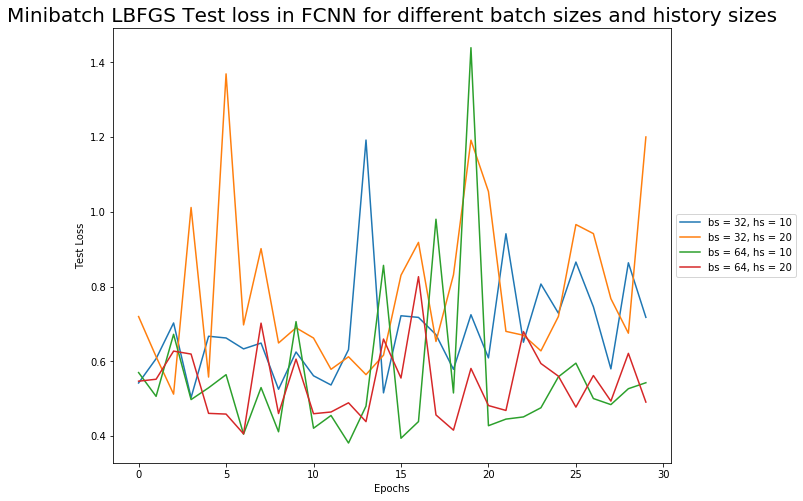

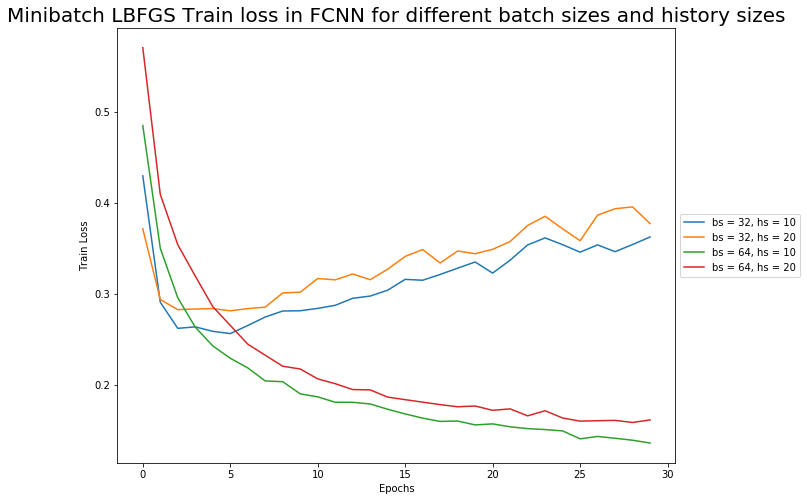

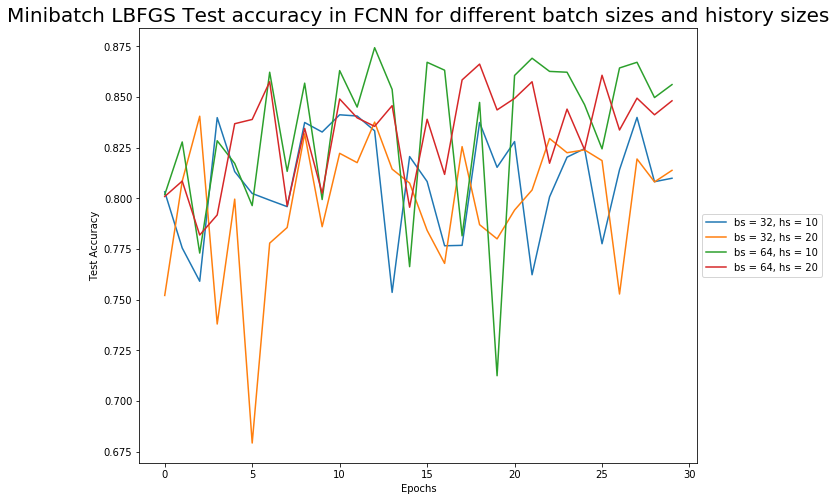

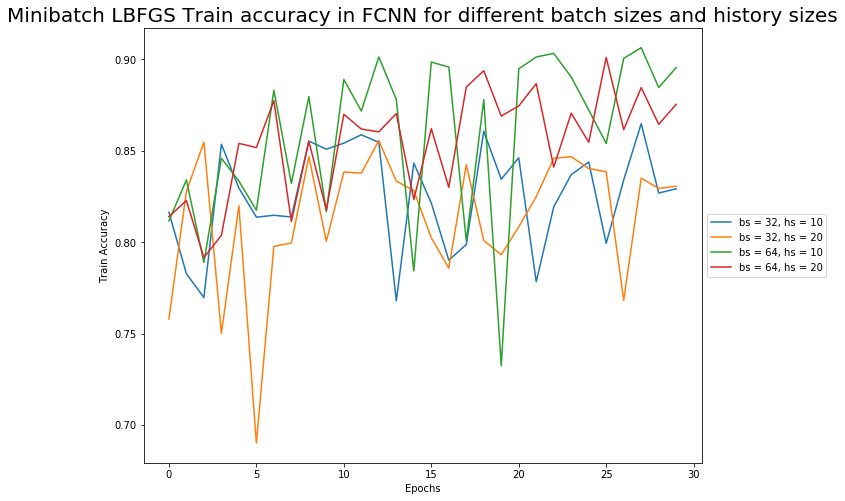

In [9]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("1/mini_LBFGS_train_acc_fcnn.jpg")

In [16]:
minibatch_size_grid = [128,512,1024]

history_size_grid=[10,20]

In [19]:
training_loss_fcnn2, test_loss_fcnn,training_accuracy_fcnn2, test_accuracy_fcnn2, time_fcnn2 = hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, max_iter,epochs, "FCNN2")

Of Images Tested = 60000
Model Accuracy = 0.8853833333333333
Test loss: 1.2037982791662216 

Epoch 20
Training loss: 0.019757037682920472
Number Of Images Tested = 10000
Model Accuracy = 0.8631
Number Of Images Tested = 60000
Model Accuracy = 0.9136
Test loss: 0.9592636346817016 

Epoch 21
Training loss: 0.016414386274537736
Number Of Images Tested = 10000
Model Accuracy = 0.8632
Number Of Images Tested = 60000
Model Accuracy = 0.90975
Test loss: 0.9877932846546174 

Epoch 22
Training loss: 0.020534675650720847
Number Of Images Tested = 10000
Model Accuracy = 0.8597
Number Of Images Tested = 60000
Model Accuracy = 0.9087666666666666
Test loss: 1.073169583082199 

Epoch 23
Training loss: 0.016809262754592918
Number Of Images Tested = 10000
Model Accuracy = 0.8652
Number Of Images Tested = 60000
Model Accuracy = 0.9184833333333333
Test loss: 1.1192024946212769 

Epoch 24
Training loss: 0.017615164805724587
Number Of Images Tested = 10000
Model Accuracy = 0.859
Number Of Images Tested = 6

In [22]:
np.savetxt('2/LBFGS_minibatch_fcNN_trainloss.txt', training_loss_fcnn2)
np.savetxt('2/LBFGS_minibatch_fcNN_testloss.txt', test_loss_fcnn)
np.savetxt('2/LBFGS_minibatch_fcNN_trainacc.txt', training_accuracy_fcnn2)
np.savetxt('2/LBFGS_minibatch_fcNN_testacc.txt', test_accuracy_fcnn2)
np.savetxt('2/LBFGS_minibatch_fcNN_times.txt',time_fcnn2)

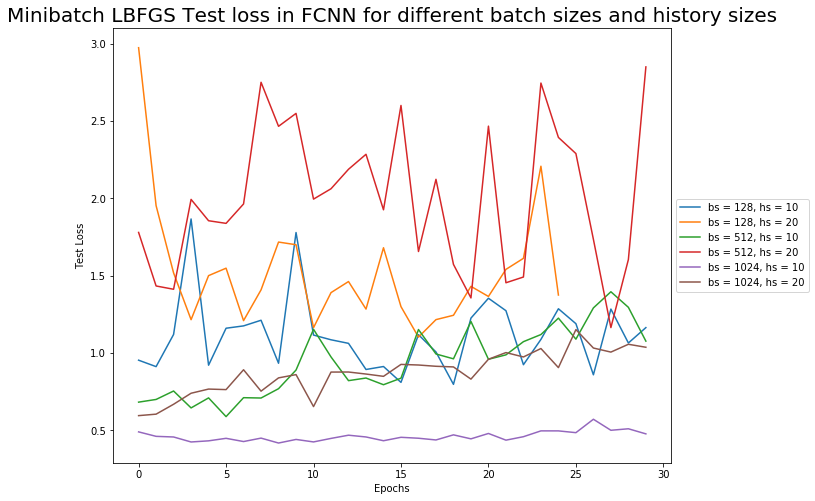

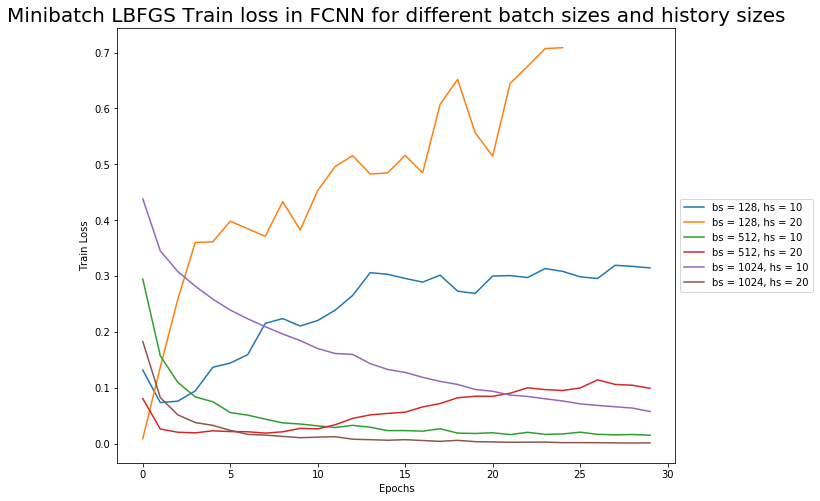

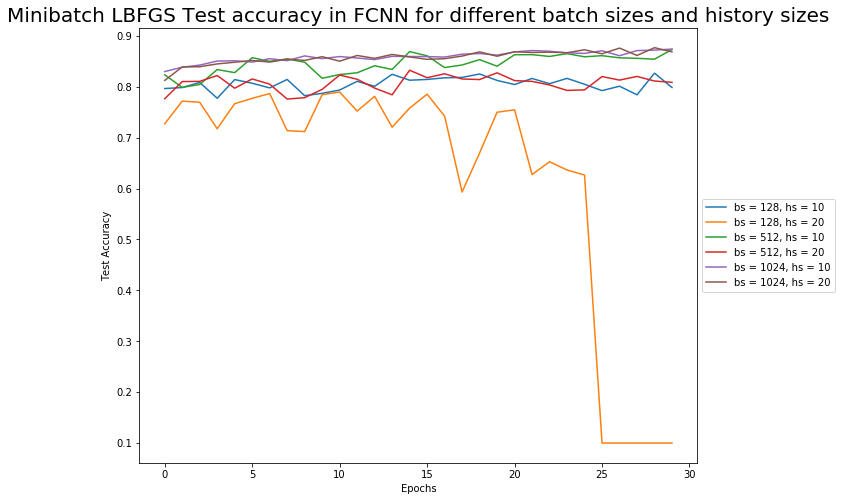

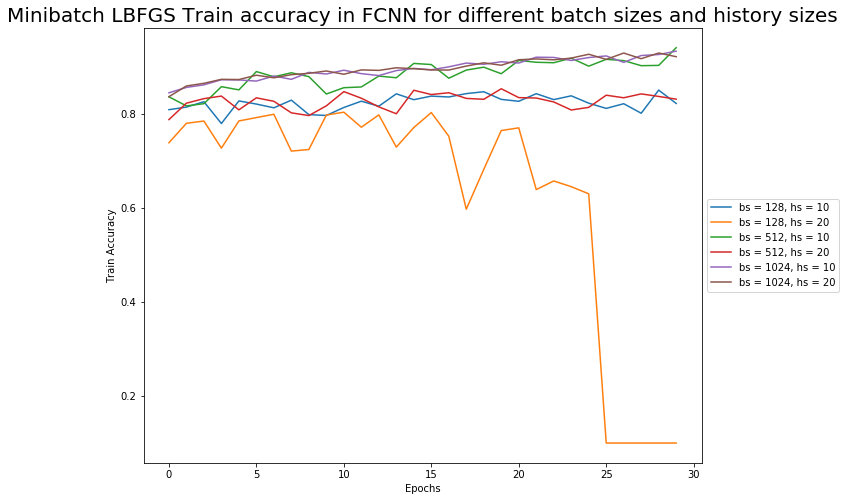

In [24]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn2[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("2/mini_LBFGS_train_acc_fcnn.jpg")

In [11]:
minibatch_size_grid = [2048,4096]
max_iter = 20
epochs = 30
history_size_grid=[10,20]

In [12]:
training_loss_fcnn3, test_loss_fcnn3,training_accuracy_fcnn3, test_accuracy_fcnn3, time_fcnn3 = hyperparameters_tuning_LBFGS_minibatch(trainset,valset,minibatch_size_grid, history_size_grid, max_iter,epochs, "FCNN2")

uracy = 0.8509
Number Of Images Tested = 60000
Model Accuracy = 0.87825
Test loss: 0.4329738438129425 

Epoch 20
Training loss: 0.23620370278755823
Number Of Images Tested = 10000
Model Accuracy = 0.8513
Number Of Images Tested = 60000
Model Accuracy = 0.8791166666666667
Test loss: 0.41302432417869567 

Epoch 21
Training loss: 0.22894783119360607
Number Of Images Tested = 10000
Model Accuracy = 0.862
Number Of Images Tested = 60000
Model Accuracy = 0.8886833333333334
Test loss: 0.4179393768310547 

Epoch 22
Training loss: 0.22486781229575475
Number Of Images Tested = 10000
Model Accuracy = 0.8525
Number Of Images Tested = 60000
Model Accuracy = 0.8839666666666667
Test loss: 0.4272325932979584 

Epoch 23
Training loss: 0.22344494511683782
Number Of Images Tested = 10000
Model Accuracy = 0.8667
Number Of Images Tested = 60000
Model Accuracy = 0.8939
Test loss: 0.394692063331604 

Epoch 24
Training loss: 0.21862459232409795
Number Of Images Tested = 10000
Model Accuracy = 0.8535
Number Of

In [13]:

np.savetxt('3/LBFGS_minibatch_fcNN_trainloss.txt', training_loss_fcnn3)
np.savetxt('3/LBFGS_minibatch_fcNN_testloss.txt', test_loss_fcnn3)
np.savetxt('3/LBFGS_minibatch_fcNN_trainacc.txt', training_accuracy_fcnn3)
np.savetxt('3/LBFGS_minibatch_fcNN_testacc.txt', test_accuracy_fcnn3)
np.savetxt('3/LBFGS_minibatch_fcNN_times.txt',time_fcnn3)



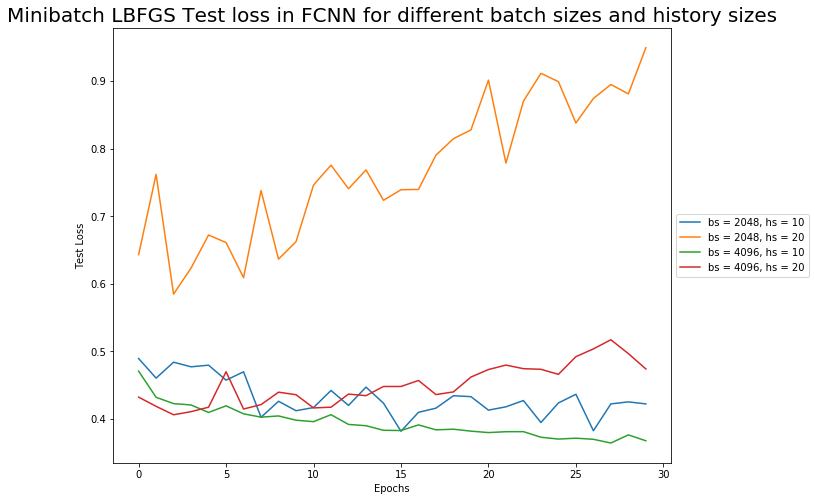

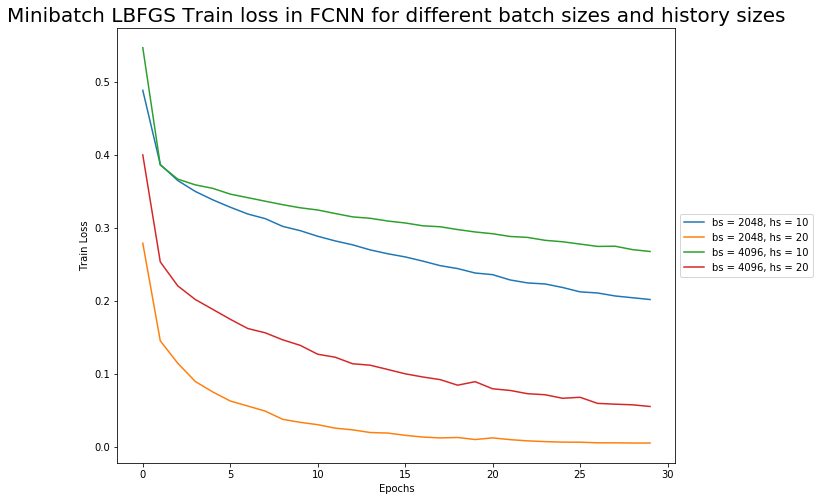

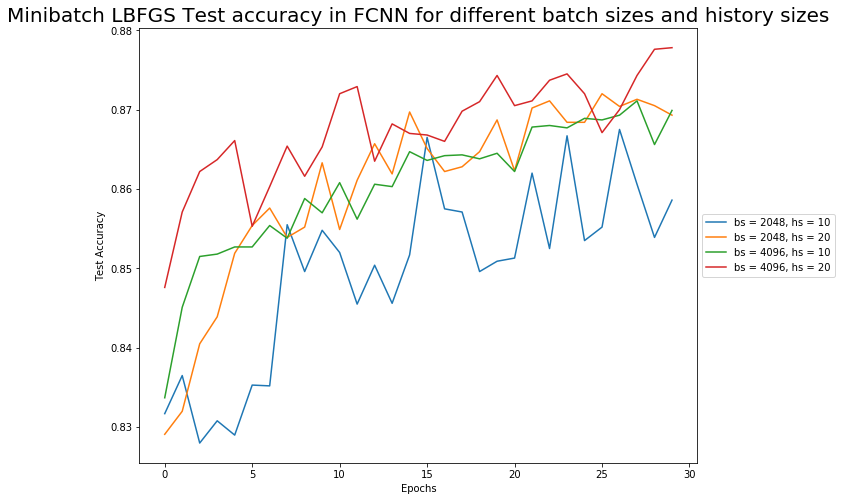

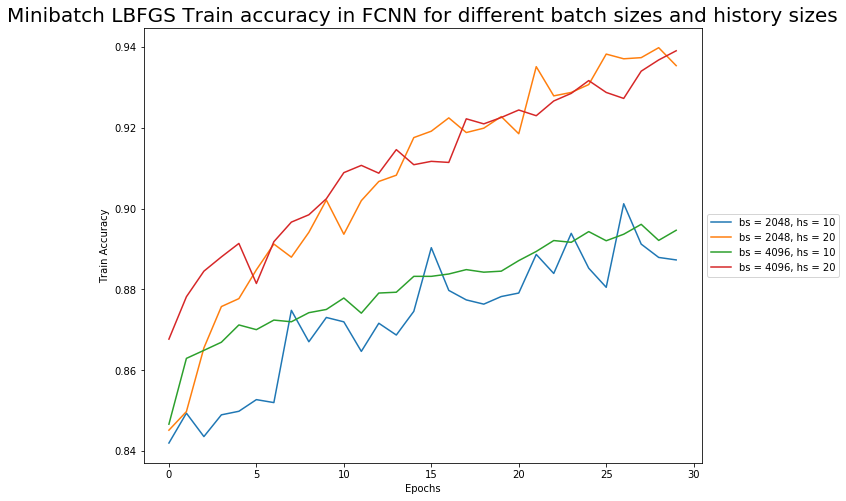

In [14]:
i = 0
for bs_index,bs in enumerate(minibatch_size_grid):
    for hs_index,hs in enumerate(history_size_grid):
        plt.figure(1, figsize = (10,8))
        plt.plot(test_loss_fcnn3[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(2, figsize = (10,8))
        plt.plot(training_loss_fcnn3[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(3, figsize = (10,8))
        plt.plot(test_accuracy_fcnn3[i],label='bs = {}, hs = {}'.format(bs,hs))
        plt.figure(4, figsize = (10,8))
        plt.plot(training_accuracy_fcnn3[i],label='bs = {}, hs = {}'.format(bs,hs))
        i+=1

plt.figure(1)
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Minibatch LBFGS Test loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("3/mini_LBFGS_test_loss_fcnn.jpg")
plt.figure (2)
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.title('Minibatch LBFGS Train loss in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("3/mini_LBFGS_train_loss_fcnn.jpg")
plt.figure (3)
plt.xlabel('Epochs')
plt.ylabel('Test Accuracy')
plt.title('Minibatch LBFGS Test accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("3/mini_LBFGS_test_acc_fcnn.jpg")
plt.figure (4)
plt.xlabel('Epochs')
plt.ylabel('Train Accuracy')
plt.title('Minibatch LBFGS Train accuracy in FCNN for different batch sizes and history sizes',fontsize = 20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("3/mini_LBFGS_train_acc_fcnn.jpg")